In [2]:
# !pip install -U scikit-learn
# Une version récente de sklearn est nécessaire pour gamma='scale' (cf. plusbas)

In [46]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [54]:
# Chargement des données
X, y = iris.data[:,:2], iris.target

# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Text(0.5, 1.0, 'SVM RBF')

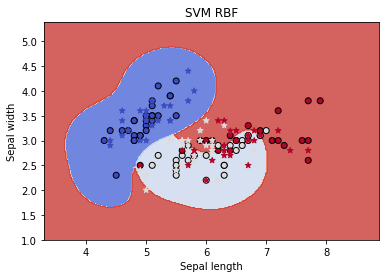

In [57]:
clf = svm.SVC(C=1, kernel='rbf', gamma=3)
clf.fit(X_train, y_train)
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = .02
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Surface de décision
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k',c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test,cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVM RBF")

In [59]:
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6133333333333333

#### Question 4

La paramètre gamme distort les frontières

#### Question 5

In [101]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(1797, 64)
(1797,)


#### Question 6

In [102]:
lin_svc = svm.LinearSVC(C=0.5, max_iter=10000000)
lin_svc.fit(X_train, y_train)

y_pred=lin_svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9361111111111111

In [103]:
clf = svm.SVC(C=10, kernel='rbf', gamma='scale', max_iter=100000)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9888888888888889

#### Question 7

In [104]:
from sklearn.model_selection import GridSearchCV
# standardiser les données

# grille de parametres
param_grid = {'C' : [2,2.25,2.5,2.75,3],'gamma':[0.001,0.00075,0.0005,0.00025,0.00001], 'kernel' : ['rbf']}

#initialiser une recherche sur grille
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

#faire tourner la recherche sur grille
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ......C=2, gamma=0.001, kernel=rbf;, score=0.990 total time=   0.1s
[CV 2/5] END ......C=2, gamma=0.001, kernel=rbf;, score=0.986 total time=   0.1s
[CV 3/5] END ......C=2, gamma=0.001, kernel=rbf;, score=0.983 total time=   0.1s
[CV 4/5] END ......C=2, gamma=0.001, kernel=rbf;, score=0.990 total time=   0.1s
[CV 5/5] END ......C=2, gamma=0.001, kernel=rbf;, score=0.990 total time=   0.1s
[CV 1/5] END ....C=2, gamma=0.00075, kernel=rbf;, score=0.993 total time=   0.1s
[CV 2/5] END ....C=2, gamma=0.00075, kernel=rbf;, score=0.986 total time=   0.1s
[CV 3/5] END ....C=2, gamma=0.00075, kernel=rbf;, score=0.983 total time=   0.1s
[CV 4/5] END ....C=2, gamma=0.00075, kernel=rbf;, score=0.990 total time=   0.1s
[CV 5/5] END ....C=2, gamma=0.00075, kernel=rbf;, score=0.990 total time=   0.1s
[CV 1/5] END .....C=2, gamma=0.0005, kernel=rbf;, score=0.997 total time=   0.1s
[CV 2/5] END .....C=2, gamma=0.0005, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [2, 2.25, 2.5, 2.75, 3],
                         'gamma': [0.001, 0.00075, 0.0005, 0.00025, 1e-05],
                         'kernel': ['rbf']},
             verbose=3)

In [105]:
print(grid.best_params_)

{'C': 3, 'gamma': 0.0005, 'kernel': 'rbf'}


In [108]:
grid_prediction = grid.predict(X_test)
accuracy_score(y_test,grid_prediction)

0.9916666666666667